In [4]:
# Recommender System Correlation Matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [5]:
columns_name=['user_id','item_id','rating','timestamp']
df=pd.read_csv("u.data",sep="\t",names=columns_name)        
print(df.head())
df.shape

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


(100000, 4)

In [6]:
movies = pd.read_csv("u.item", sep="|", header=None, encoding="ISO-8859-1")

In [7]:
print(movies.shape)
movies.head()

(1682, 24)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
movies=movies[[0,1]]
movies.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
movies.columns=['item_id','title'] 
movies.head(1)

,item_id,title
0,1,Toy Story (1995)


### merging both dataframes

In [11]:
df=pd.merge(df,movies,on="item_id")

In [12]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [13]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [14]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])
print(ratings.head())

                             rating  number of ratings
title                                                 
'Til There Was You (1997)  2.333333                  9
1-900 (1994)               2.600000                  5
101 Dalmatians (1996)      2.908257                109
12 Angry Men (1957)        4.344000                125
187 (1997)                 3.024390                 41


In [15]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

<function matplotlib.pyplot.show(close=None, block=None)>

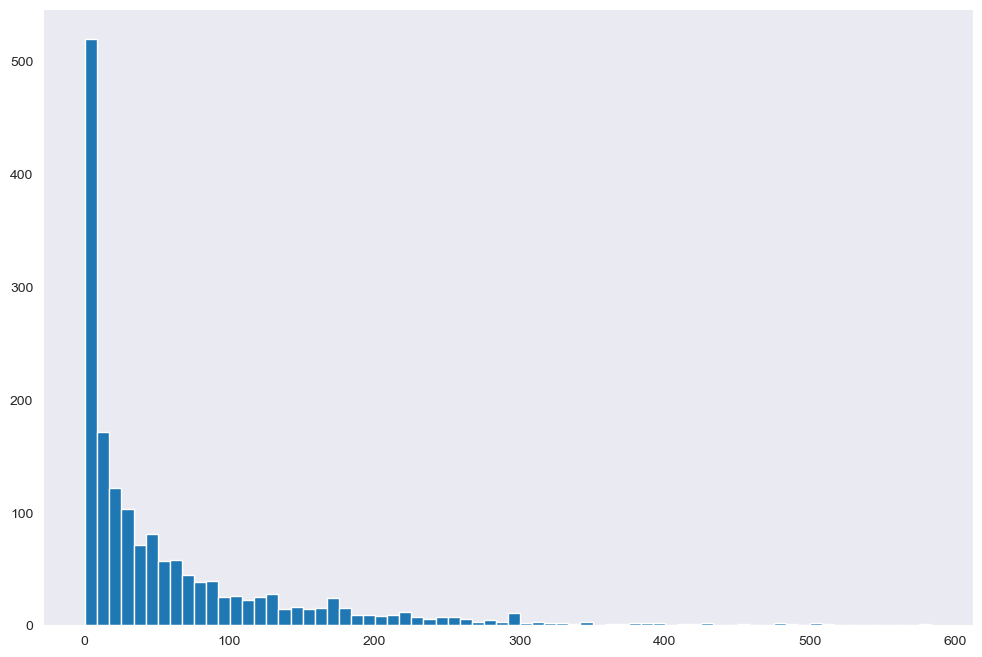

In [17]:
plt.figure(figsize=(12,8))
plt.hist(ratings['number of ratings'], bins=70,)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

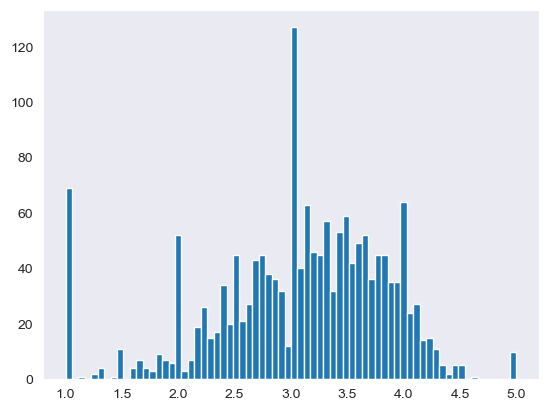

In [18]:
plt.hist(ratings['rating'],bins=70)
plt.show

c:\Users\ftlxy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ftlxy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


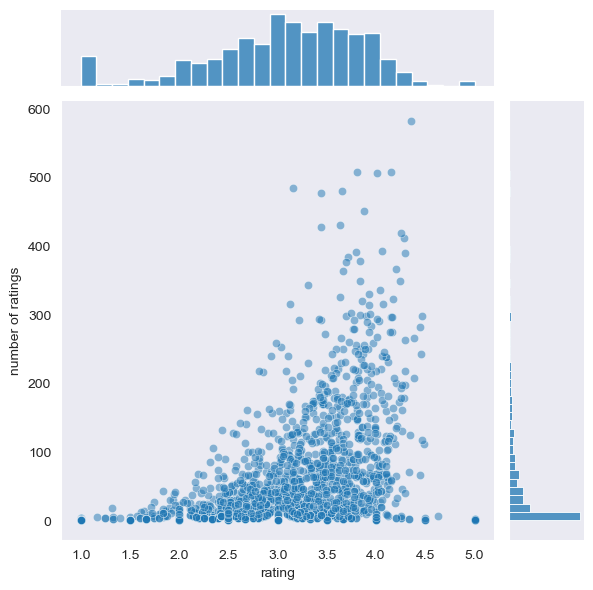

In [19]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5)

In [20]:
moviematrix=df.pivot_table(index="user_id",columns="title",values='rating')
print(moviematrix)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1

In [21]:
starwars_user_ratings=moviematrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [22]:
similar_to_starwars=moviematrix.corrwith(starwars_user_ratings)    

c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [23]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [24]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [25]:
corr_starwars.dropna(inplace=True)

In [26]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [27]:
corr_starwars=corr_starwars.join(ratings['number of ratings'])

In [28]:
corr_starwars.head()

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [29]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('correlation',ascending=False)

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [30]:
def predict_movies(movie_name):
    movie_user_ratings=moviematrix[movie_name]
    similar_to_movie=moviematrix.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['number of ratings'])
    predictions=corr_movie[corr_movie['number of ratings']>100].sort_values('correlation',ascending=False)
    return predictions
predictions=predict_movies("As Good As It Gets (1997)")
predictions.head()

c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\ftlxy\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,correlation,number of ratings
title,,
As Good As It Gets (1997),1.000000,112
Apt Pupil (1998),0.701931,160
"Mask, The (1994)",0.618215,129
Batman Forever (1995),0.587782,114
Glory (1989),0.533915,171


In [31]:
dateparse = lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

rating_df = pd.read_csv('u.data', sep='\t', 
                        names=['user_id', 'movie_id', 'rating', 'timestamp'], 
                        parse_dates=['timestamp'], 
                        date_parser=dateparse)

movie_df = pd.read_csv('u.item', sep='|', encoding='latin-1',
                    names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 
                           'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 
                           'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'])

user_df = pd.read_csv('u.user', sep='|', encoding='latin-1',
                     names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

C:\Users\ftlxy\AppData\Local\Temp\ipykernel_14184\3214051321.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  rating_df = pd.read_csv('u.data', sep='\t',


In [32]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   action              1682 non-null   int64  
 7   adventure           1682 non-null   int64  
 8   animation           1682 non-null   int64  
 9   childrens           1682 non-null   int64  
 10  comedy              1682 non-null   int64  
 11  crime               1682 non-null   int64  
 12  documentary         1682 non-null   int64  
 13  drama               1682 non-null   int64  
 14  fantasy             1682 non-null   int64  
 15  film_noir           1682 non-null   int64  
 16  horror

In [ ]:
movie_df.release_date = pd.to_datetime(movie_df.release_date)
movie_df.describe()

,movie_id,release_date,video_release_date,unknown,action,adventure,animation,childrens,comedy,crime,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
count,1682.000000,1681,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,1989-07-16 12:53:32.373587072,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
min,1.000000,1922-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,1993-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,1995-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,1996-10-18 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1998-10-23 00:00:00,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,485.695893,NaN,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714


In [37]:
def check_nan_percent(df):
    columns_null_count = df.isnull().sum()
    null_percent_df = pd.DataFrame({'null_percent': (columns_null_count/df.shape[0])*100, 'total_null': columns_null_count})
    return null_percent_df[null_percent_df.null_percent>0]

In [38]:
check_nan_percent(movie_df)

,null_percent,total_null


In [40]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  int64         
 1   movie_id   100000 non-null  int64         
 2   rating     100000 non-null  int64         
 3   timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.1 MB


In [41]:
rating_df.sample(6)

,user_id,movie_id,rating,timestamp
64187,769,1028,3,1998-01-21 23:09:46
80975,854,757,3,1997-12-22 18:10:35
39615,399,1086,3,1997-12-17 06:40:27
1563,18,113,5,1997-11-21 16:27:08
72915,605,215,3,1997-11-13 13:02:43
16588,436,161,4,1998-02-18 03:18:17


In [42]:
rating_df.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,100000
mean,462.48475,425.530130,3.529860,1997-12-31 00:40:51.488619904
min,1.00000,1.000000,1.000000,1997-09-20 03:05:10
25%,254.00000,175.000000,3.000000,1997-11-13 19:18:29.500000
50%,447.00000,322.000000,4.000000,1997-12-22 21:42:24
75%,682.00000,631.000000,4.000000,1998-02-23 18:53:04
max,943.00000,1682.000000,5.000000,1998-04-22 23:10:38
std,266.61442,330.798356,1.125674,NaN


In [43]:
check_nan_percent(rating_df)

,null_percent,total_null


In [44]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [45]:
user_df.sample(6)

,user_id,age,gender,occupation,zip_code
807,808,45,M,salesman,90016
751,752,60,M,retired,21201
454,455,48,M,administrator,83709
325,326,41,M,administrator,15235
881,882,35,M,engineer,40503
581,582,17,M,student,93003


In [47]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [48]:
check_nan_percent(user_df)

,null_percent,total_null


In [50]:
user_df['age_group'] = user_df.age.apply(lambda age: 'Gradeschooler' if 5<=age<=12 else ('Teenager' if 13<=age<=19 else ('Young' if 20<=age<=35 else ('Midlife' if 35<=age<=55 else 'Old'))))
user_df.sample(5)

,user_id,age,gender,occupation,zip_code,age_group
813,814,30,M,other,12345,Young
28,29,41,M,programmer,94043,Midlife
30,31,24,M,artist,10003,Young
942,943,22,M,student,77841,Young
523,524,56,M,educator,02159,Old


In [51]:
rating_user_df = rating_df.join(other=user_df, how='inner', on='user_id', lsuffix='_R')
rating_user_movie_df = rating_user_df.join(other=movie_df, how='inner', on='movie_id', rsuffix='_M')
rating_movie_df = rating_df.join(other=movie_df, how='inner', on='movie_id', rsuffix='_M')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'drama'),
  Text(1, 0, 'comedy'),
  Text(2, 0, 'action'),
  Text(3, 0, 'thriller'),
  Text(4, 0, 'romance'),
  Text(5, 0, 'adventure'),
  Text(6, 0, 'childrens'),
  Text(7, 0, 'crime'),
  Text(8, 0, 'sci_fi'),
  Text(9, 0, 'horror'),
  Text(10, 0, 'war'),
  Text(11, 0, 'mystery'),
  Text(12, 0, 'musical'),
  Text(13, 0, 'documentary'),
  Text(14, 0, 'animation'),
  Text(15, 0, 'western'),
  Text(16, 0, 'film_noir'),
  Text(17, 0, 'fantasy'),
  Text(18, 0, 'unknown')])

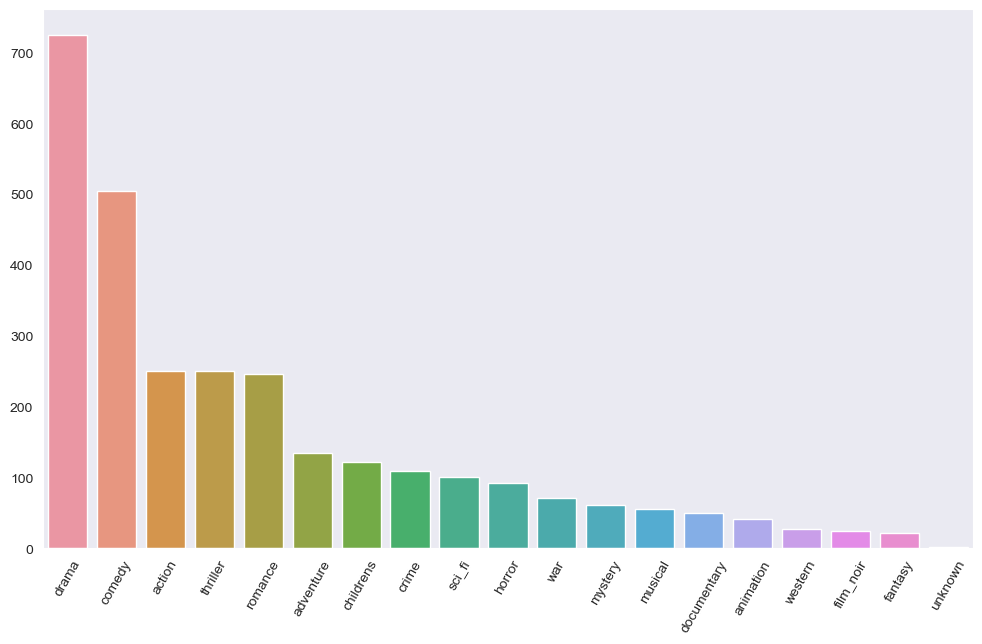

In [53]:
generes = ['unknown', 'action',
       'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery',
       'romance', 'sci_fi', 'thriller', 'war', 'western']

plt.figure(figsize=(12,7))
genere_counts = movie_df.loc[:,generes].sum().sort_values(ascending=False)
sns.barplot(x=genere_counts.index, y=genere_counts.values)
plt.xticks(rotation=60)

c:\Users\ftlxy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ftlxy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


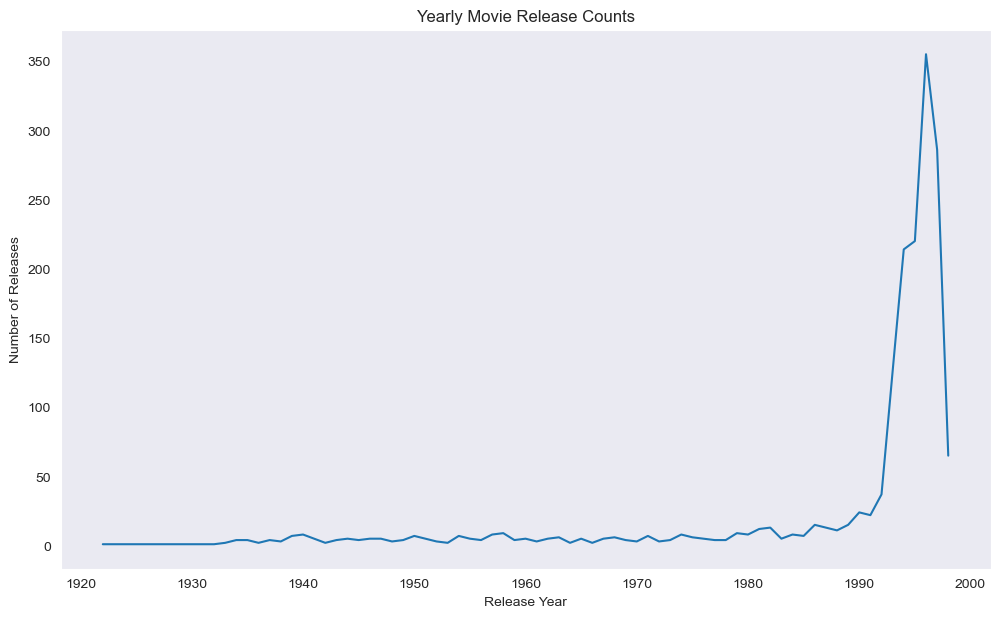

In [56]:
plt.figure(figsize=(12, 7))
yearly_release_counts = movie_df.groupby(movie_df.release_date.dt.year).size().sort_values(ascending=False)
sns.lineplot(x=yearly_release_counts.index, y=yearly_release_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.title('Yearly Movie Release Counts')
plt.show()

c:\Users\ftlxy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


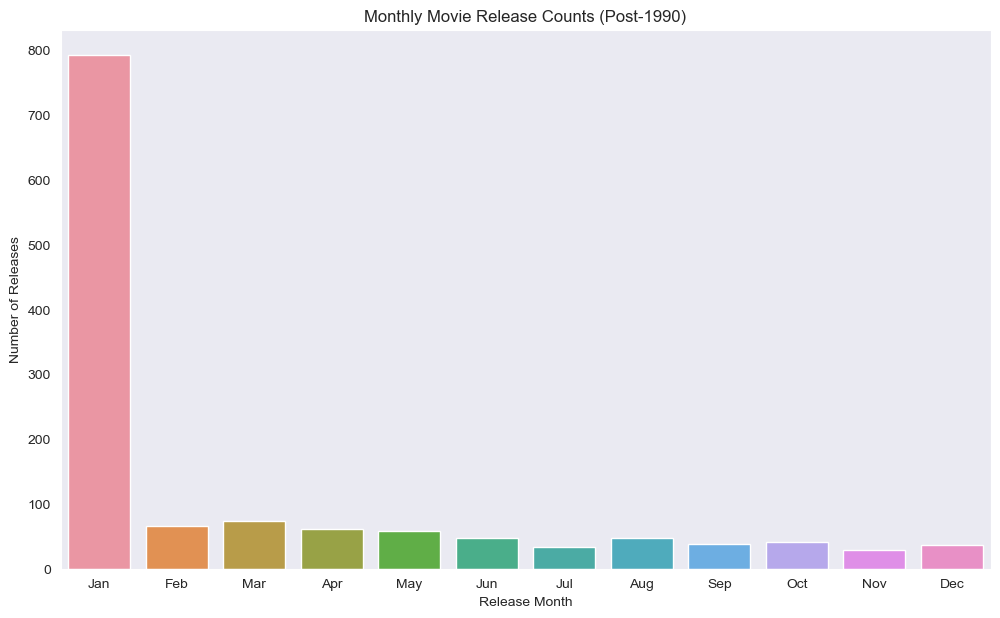

In [59]:
plt.figure(figsize=(12, 7))
monthly_release_counts = movie_df[movie_df.release_date.dt.year > 1990].groupby(movie_df.release_date.dt.month).size()
sns.barplot(x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
            y=monthly_release_counts.values)
plt.xlabel('Release Month')
plt.ylabel('Number of Releases')
plt.title('Monthly Movie Release Counts (Post-1990)')
plt.show()

c:\Users\ftlxy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


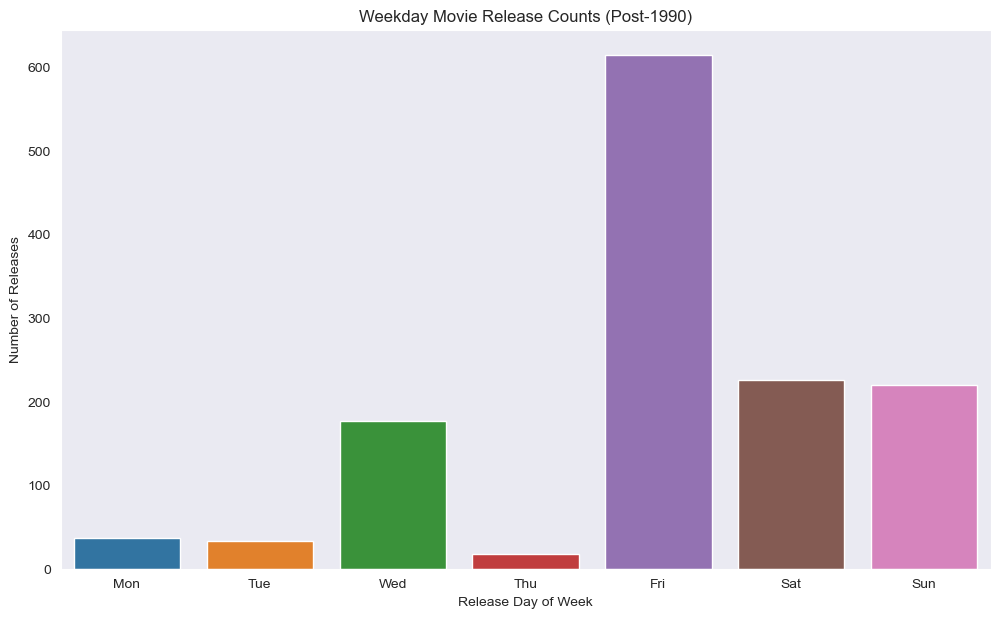

In [61]:
plt.figure(figsize=(12, 7))
weekday_release_counts = movie_df[movie_df.release_date.dt.year > 1990].groupby(movie_df.release_date.dt.dayofweek).size()

sns.barplot(x=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
            y=weekday_release_counts.values)
plt.xlabel('Release Day of Week')
plt.ylabel('Number of Releases')
plt.title('Weekday Movie Release Counts (Post-1990)')
plt.show()

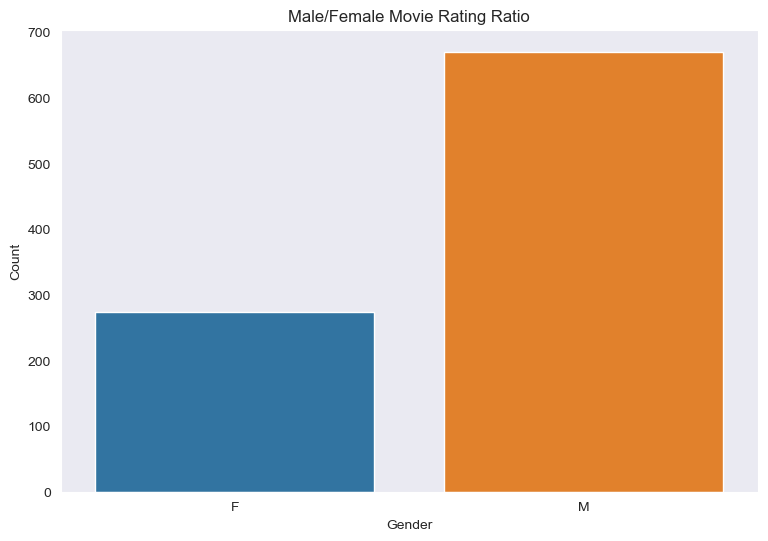

In [62]:
plt.figure(figsize=(9, 6))
gender_counts = user_df.groupby('gender').size()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Male/Female Movie Rating Ratio')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

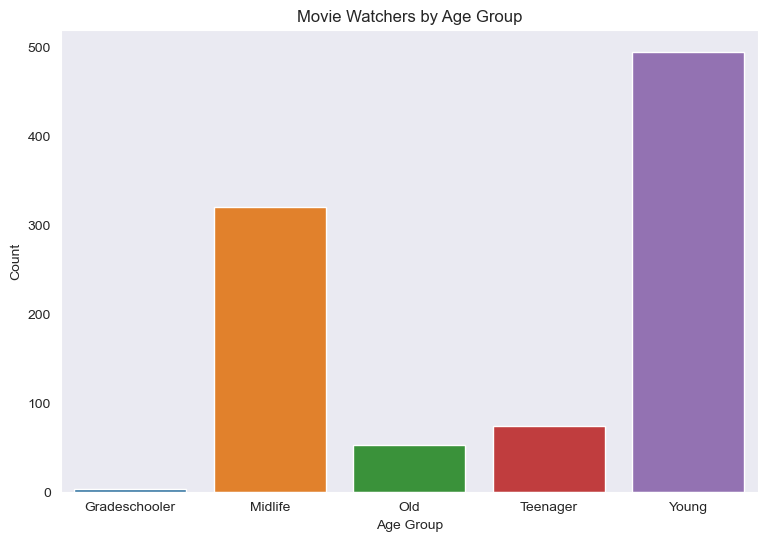

In [65]:
plt.figure(figsize=(9, 6))
age_group_counts = user_df.groupby('age_group').size()
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Movie Watchers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

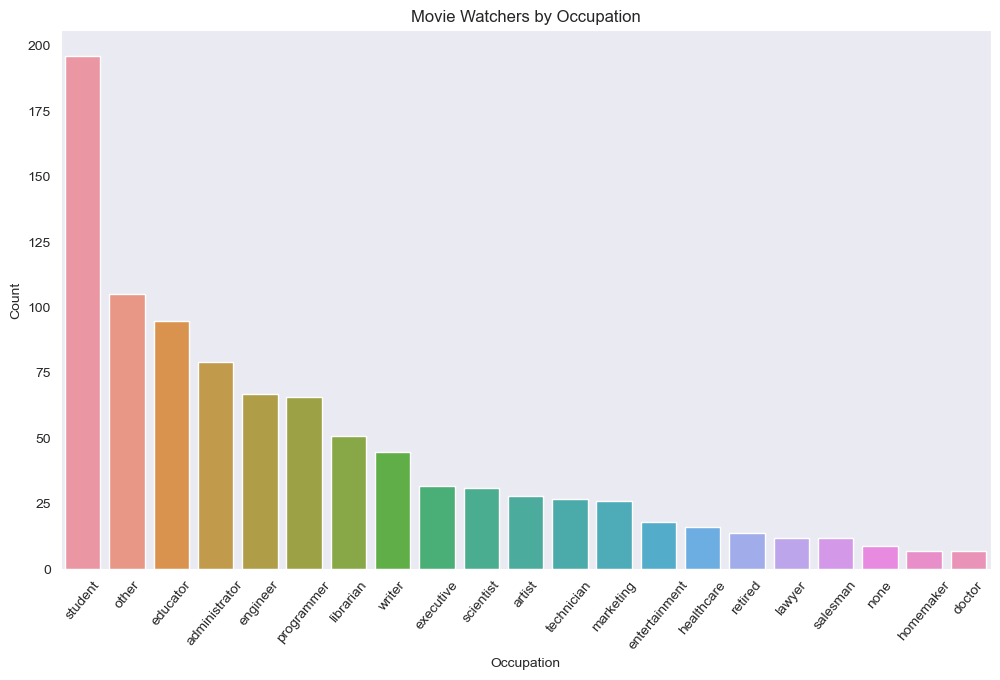

In [68]:
plt.figure(figsize=(12, 7))
movie_watcher_occupants = user_df.groupby('occupation').size().sort_values(ascending=False)
sns.barplot(x=movie_watcher_occupants.index, y=movie_watcher_occupants.values)
plt.title('Movie Watchers by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

In [66]:
pd.DataFrame(user_df.groupby(['occupation', 'age_group']).size().sort_values(ascending=False))

0
occupation age_group         
student    Young          128
           Teenager        62
other      Young           59
educator   Midlife         51
programmer Young           45
...                       ...
artist     Teenager         1
none       Gradeschooler    1
salesman   Teenager         1
retired    Midlife          1
none       Midlife          1

[62 rows x 1 columns]

In [ ]:
numeric_columns = rating_user_movie_df.select_dtypes(include='number').columns
temp_df = rating_user_movie_df.groupby('gender')[numeric_columns].sum().loc[:, generes]

temp_df = temp_df.transpose()
temp_df

gender,F,M
unknown,12,26
action,6297,14761
adventure,3451,8256
animation,1143,2665
childrens,2433,5809
comedy,9437,22131
crime,2342,5429
documentary,526,1188
drama,11523,27333
fantasy,407,1025


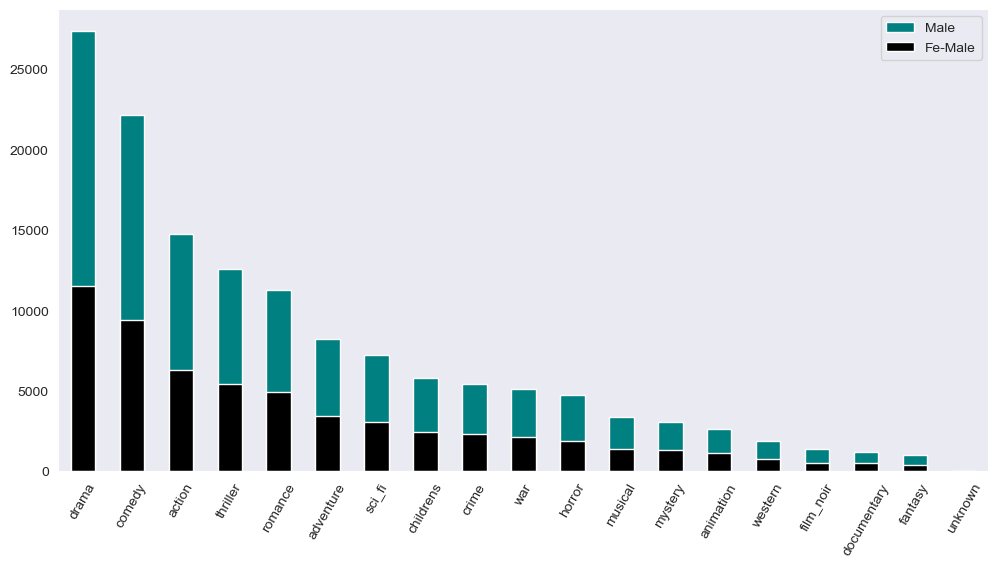

In [71]:
plt.figure(figsize=(12, 6))

temp_df.M.sort_values(ascending=False).plot(kind='bar', color='teal', label="Male")
temp_df.F.sort_values(ascending=False).plot(kind='bar', color='black', label="Fe-Male")
plt.legend()
plt.xticks(rotation=60)
plt.show()

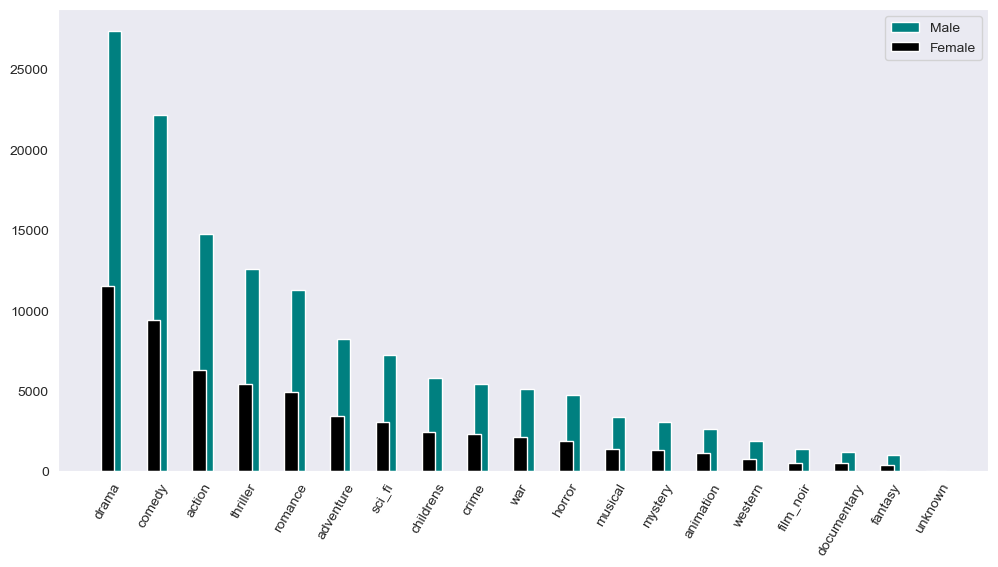

In [72]:
plt.figure(figsize=(12, 6))
m_temp_df = temp_df.M.sort_values(ascending=False)
f_temp_df = temp_df.F.sort_values(ascending=False)

plt.bar(x=m_temp_df.index, height=m_temp_df.values, label="Male", align="edge", width=0.3, color='teal')
plt.bar(x=f_temp_df.index, height=f_temp_df.values, label="Female", width=0.3, color='black')
plt.legend()
plt.xticks(rotation=60)
plt.show()

In [73]:
rating_df.groupby(rating_df.timestamp.dt.year).size()

timestamp
1997    52899
1998    47101
dtype: int64

In [74]:
rating_user_df.groupby([rating_user_df.timestamp.dt.year, 'gender']).size()

timestamp  gender
1997       F         18311
           M         34550
1998       F         11474
           M         35497
dtype: int64

In [75]:
rating_user_df.groupby([rating_user_df.timestamp.dt.year, 'age_group']).size()

timestamp  age_group    
1997       Gradeschooler       91
           Midlife          18482
           Old               2439
           Teenager          4459
           Young            27390
1998       Gradeschooler       75
           Midlife          18020
           Old               2832
           Teenager          3453
           Young            22591
dtype: int64

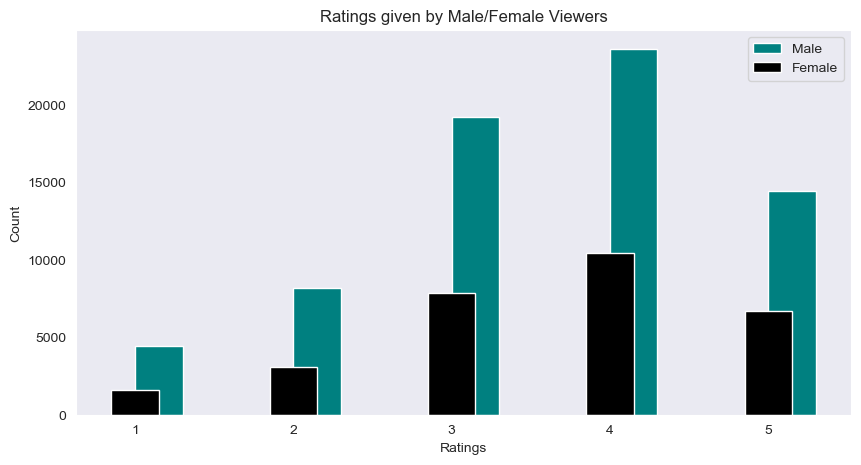

In [76]:
temp_df = rating_user_df.groupby(['gender', 'rating']).size()
plt.figure(figsize=(10, 5))
m_temp_df = temp_df.M.sort_values(ascending=False)
f_temp_df = temp_df.F.sort_values(ascending=False)

plt.bar(x=m_temp_df.index, height=m_temp_df.values, label="Male", align="edge", width=0.3, color='teal')
plt.bar(x=f_temp_df.index, height=f_temp_df.values, label="Female", width=0.3, color='black')
plt.title('Ratings given by Male/Female Viewers')
plt.legend()
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [77]:
def draw_horizontal_movie_bar(movie_titles, ratings_count, title=''):
    plt.figure(figsize=(12, 7))
    sns.barplot(y=movie_titles, x=ratings_count, orient='h')
    plt.title(title)
    plt.ylabel('Movies')
    plt.xlabel('Count')
    plt.show()

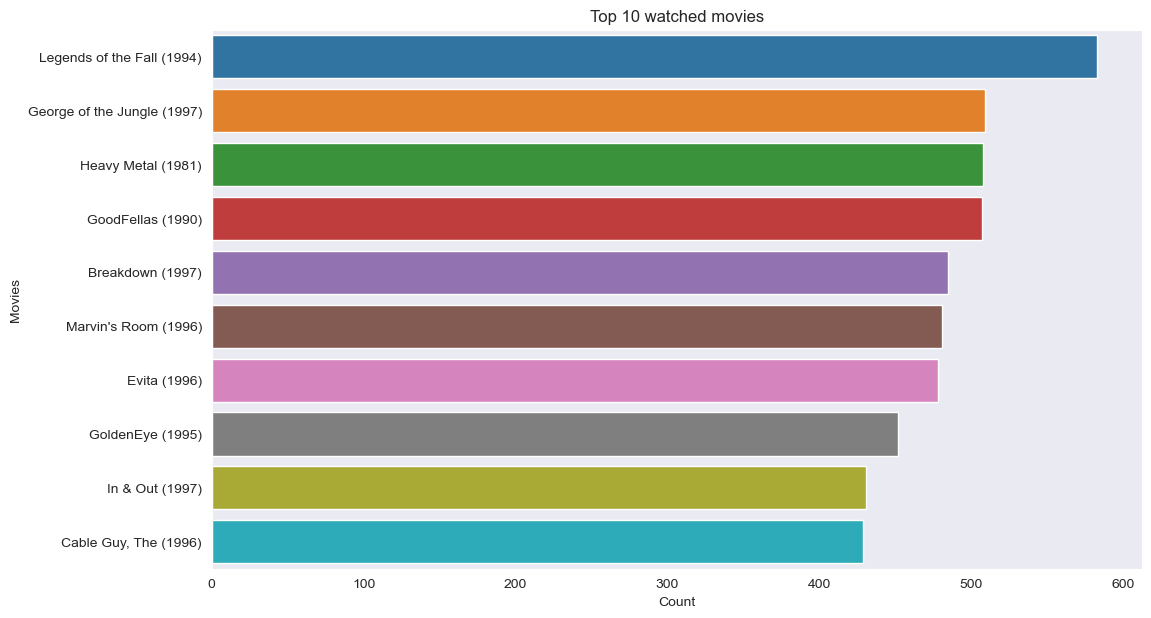

In [78]:
top_ten_rated_movies = rating_movie_df.groupby('movie_id').size().sort_values(ascending=False)[:10]
top_ten_movie_titles = movie_df.iloc[top_ten_rated_movies.index].movie_title

draw_horizontal_movie_bar(top_ten_movie_titles.values, top_ten_rated_movies.values, 'Top 10 watched movies')

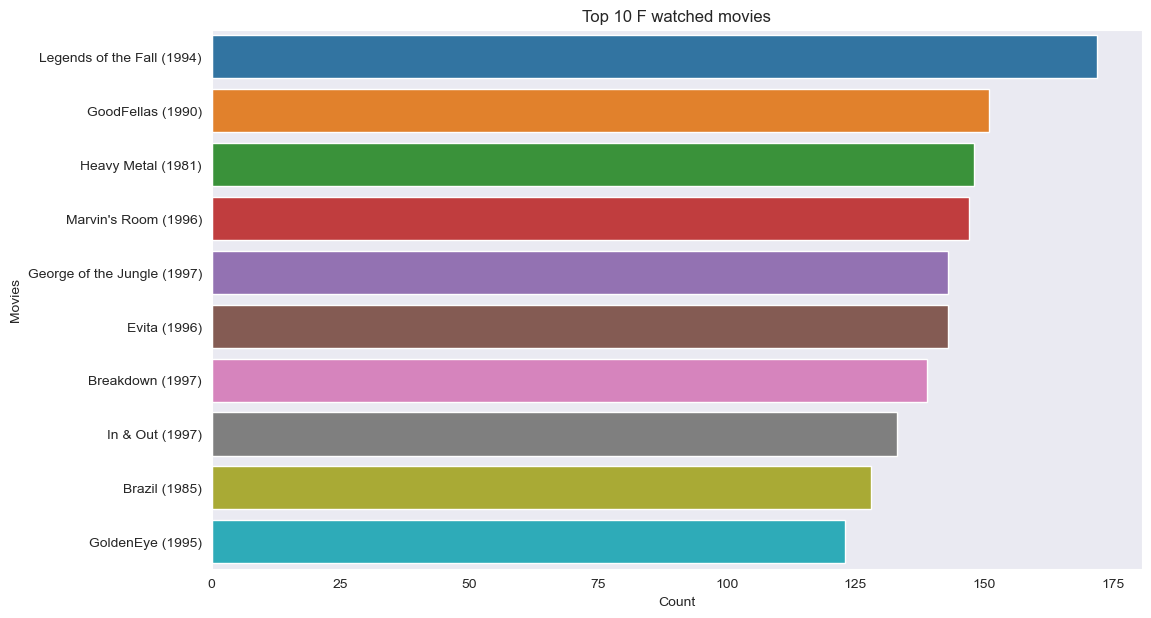

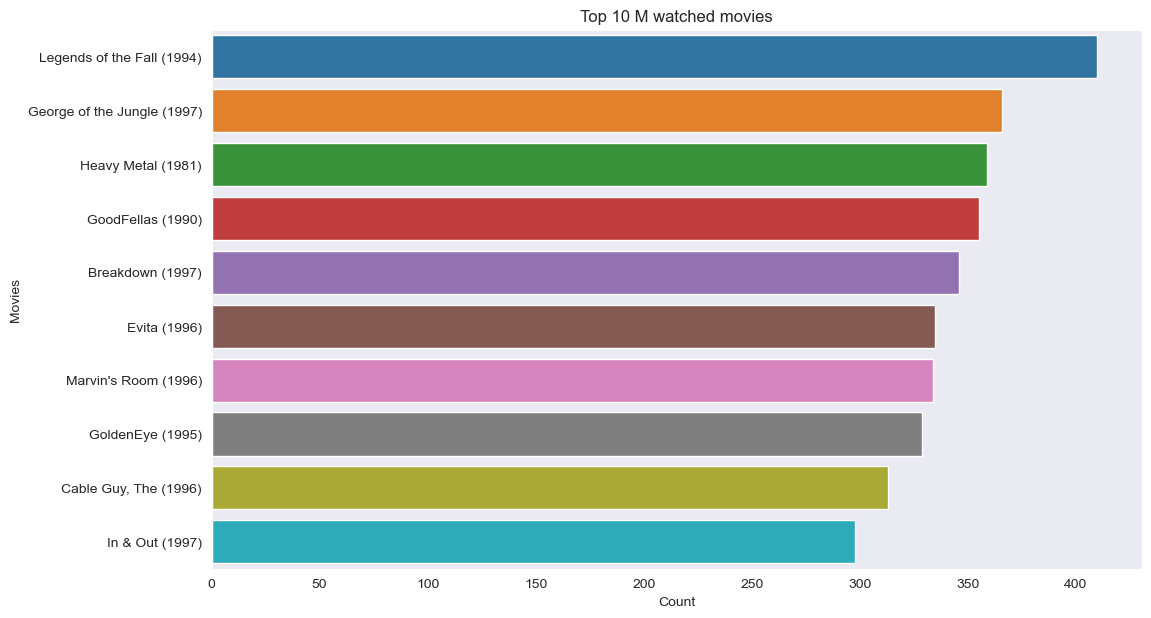

In [79]:
top_rated_movies_gender_wise = rating_user_movie_df.groupby(['gender','movie_id']).size()

for index_label in top_rated_movies_gender_wise.index.get_level_values(0).unique():

    top_10_userkind_rated_movies = top_rated_movies_gender_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_rated_movie_titles = movie_df.iloc[top_10_userkind_rated_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_rated_movie_titles.values, top_10_userkind_rated_movies.values, f'Top 10 {index_label} watched movies')

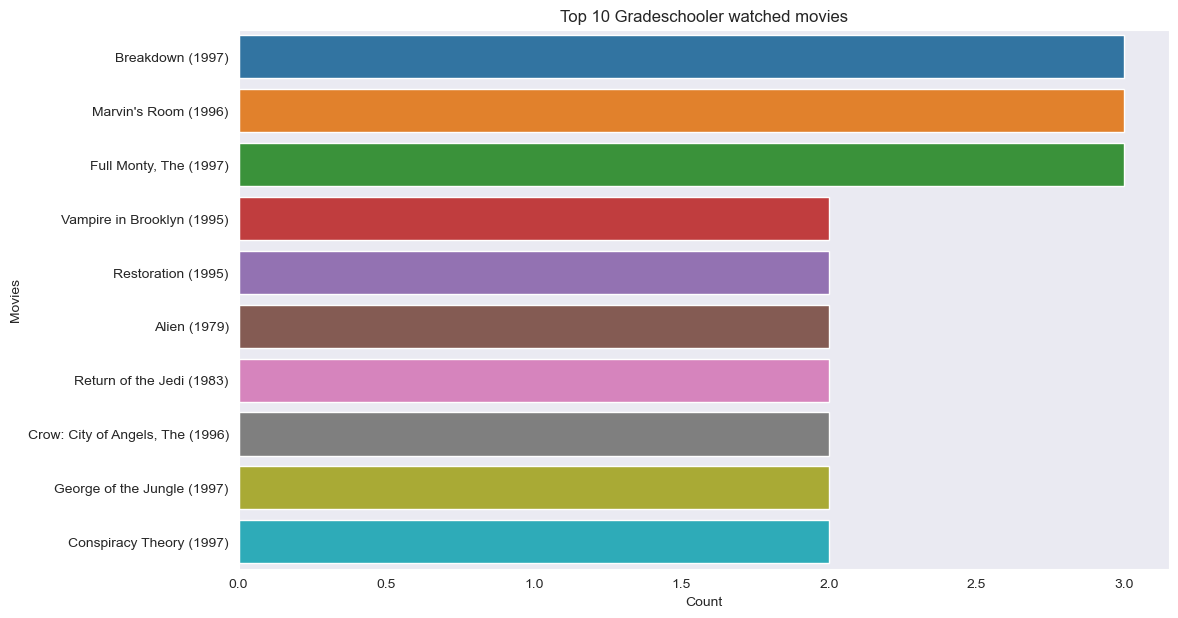

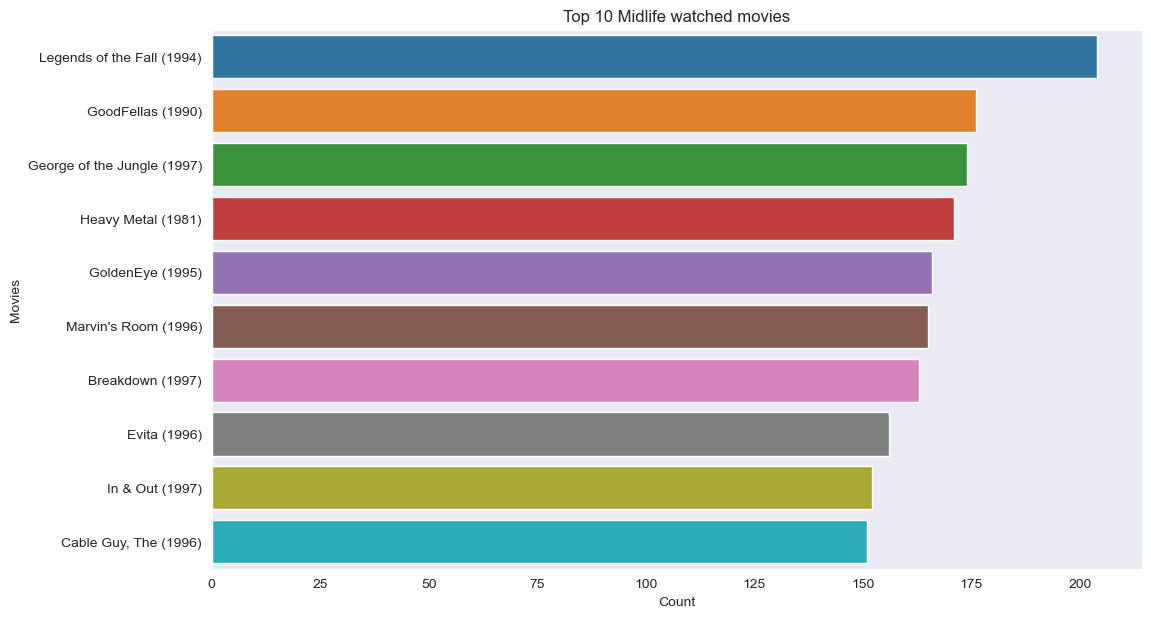

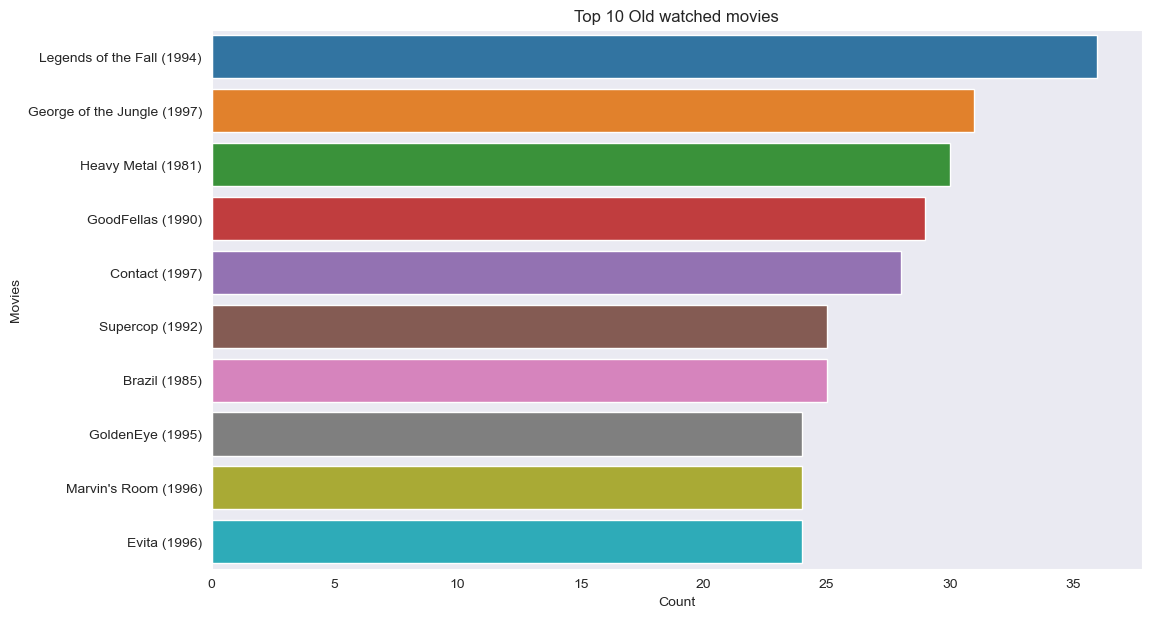

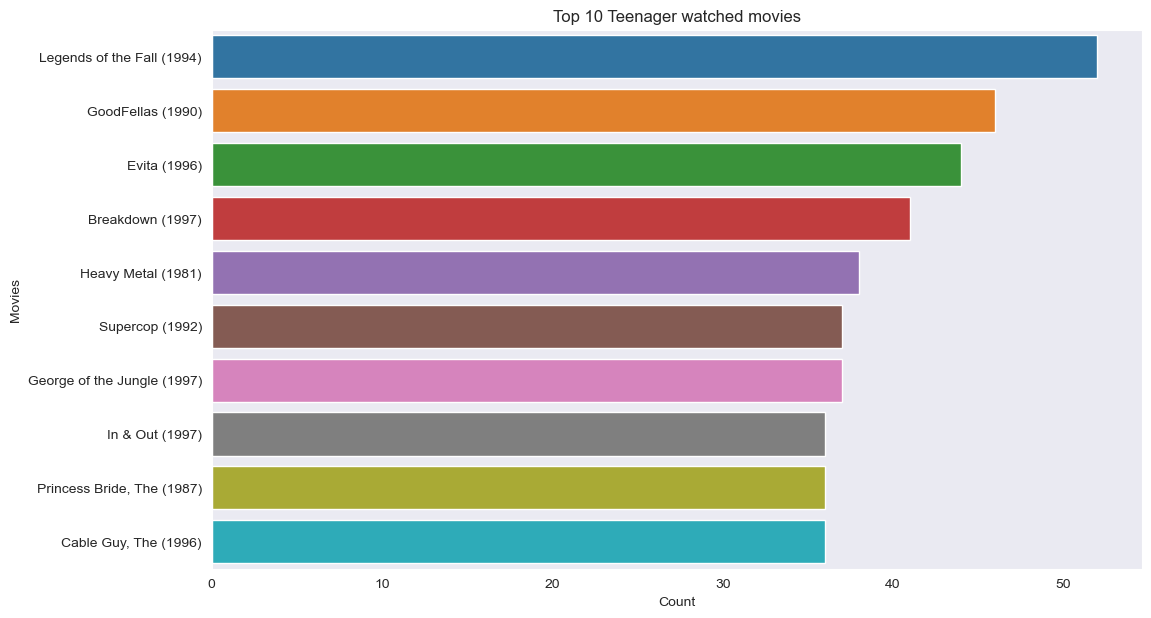

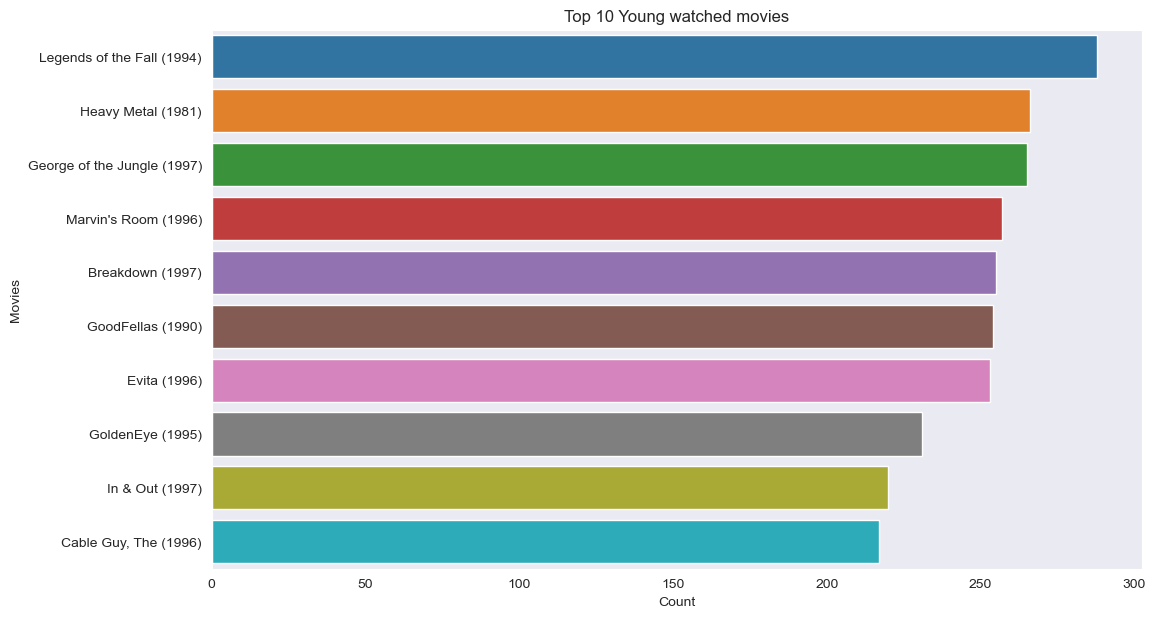

In [80]:
top_rated_movies_age_group_wise = rating_user_movie_df.groupby(['age_group','movie_id']).size()

for index_label in top_rated_movies_age_group_wise.index.get_level_values(0).unique():
    top_10_userkind_rated_movies = top_rated_movies_age_group_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_rated_movie_titles = movie_df.iloc[top_10_userkind_rated_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_rated_movie_titles.values, top_10_userkind_rated_movies.values, f'Top 10 {index_label} watched movies')

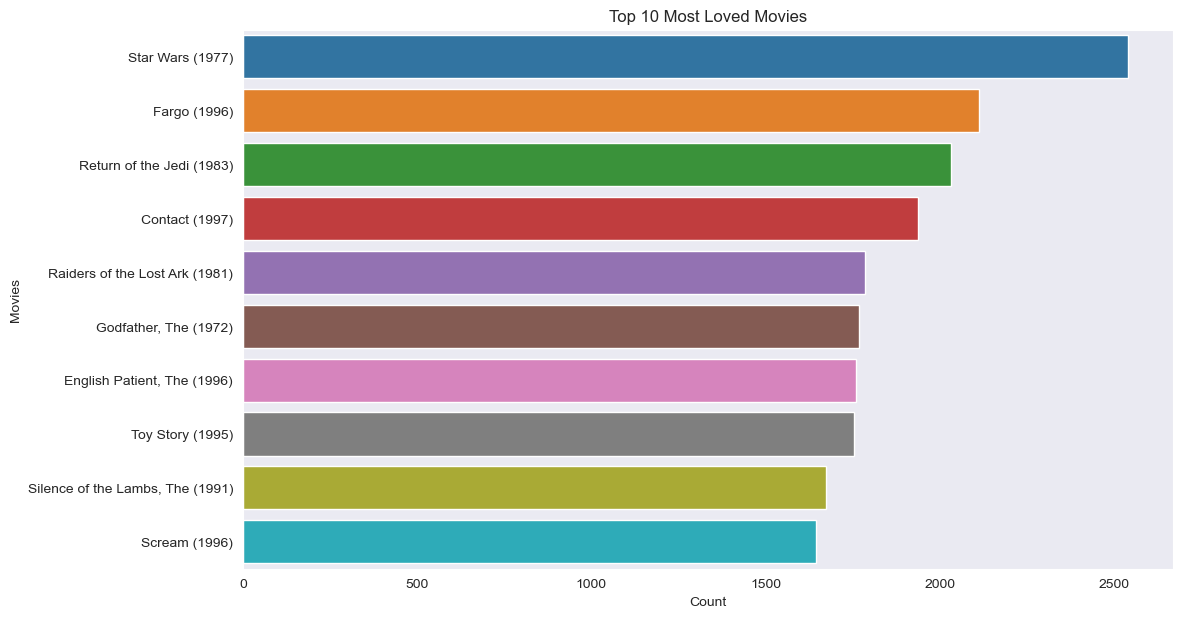

In [82]:
numeric_columns = rating_movie_df.select_dtypes(include='number').columns
top_ten_most_loved_movies = rating_movie_df.groupby('movie_id')[numeric_columns].sum().rating.sort_values(ascending=False)[:10]
top_ten_most_loved_movie_titles = movie_df.set_index('movie_id').loc[top_ten_most_loved_movies.index, 'movie_title']
draw_horizontal_movie_bar(top_ten_most_loved_movie_titles.values, top_ten_most_loved_movies.values, 'Top 10 Most Loved Movies')

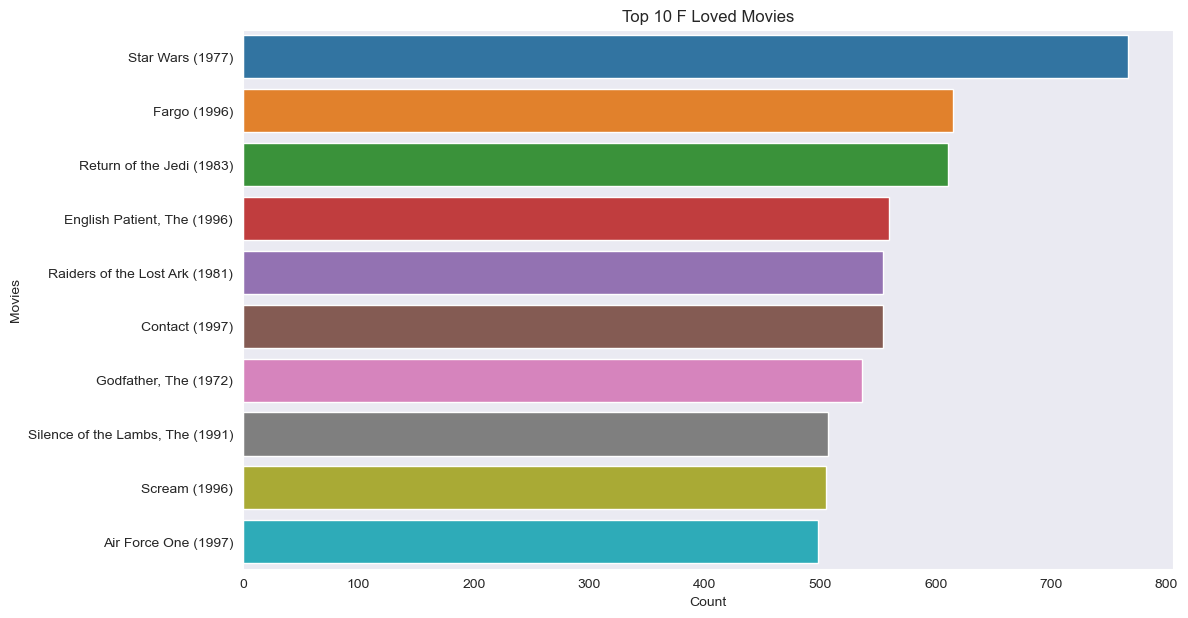

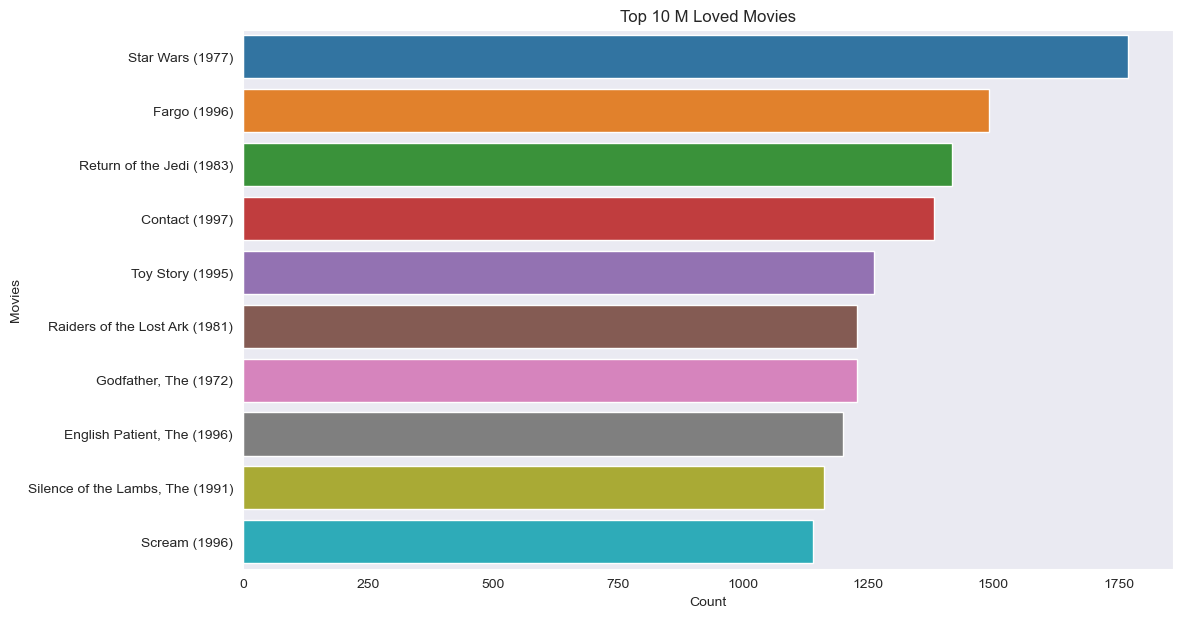

In [ ]:
numeric_columns = rating_user_movie_df.select_dtypes(include='number').columns
most_loved_movies_gender_wise = rating_user_movie_df.groupby(['gender', 'movie_id'])[numeric_columns].sum().rating

for index_label in most_loved_movies_gender_wise.index.get_level_values(0).unique():

    top_10_userkind_loved_movies = most_loved_movies_gender_wise.loc[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_loved_movie_titles = movie_df.set_index('movie_id').loc[top_10_userkind_loved_movies.index, 'movie_title']

    draw_horizontal_movie_bar(top_10_userkind_loved_movie_titles.values, top_10_userkind_loved_movies.values, f'Top 10 {index_label} Loved Movies')

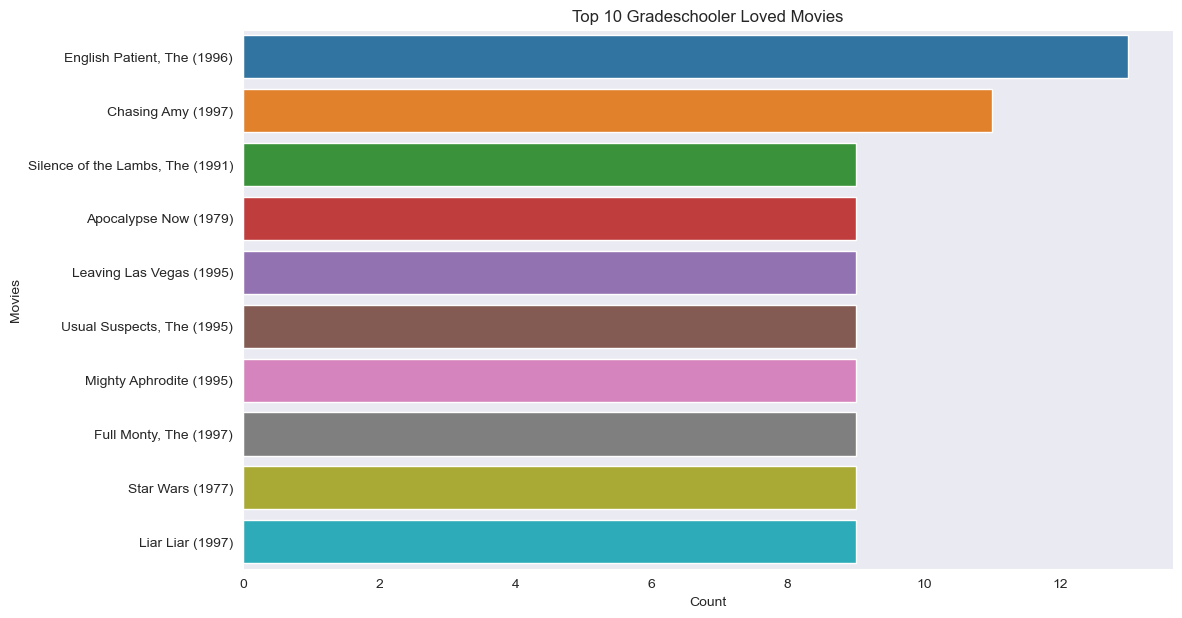

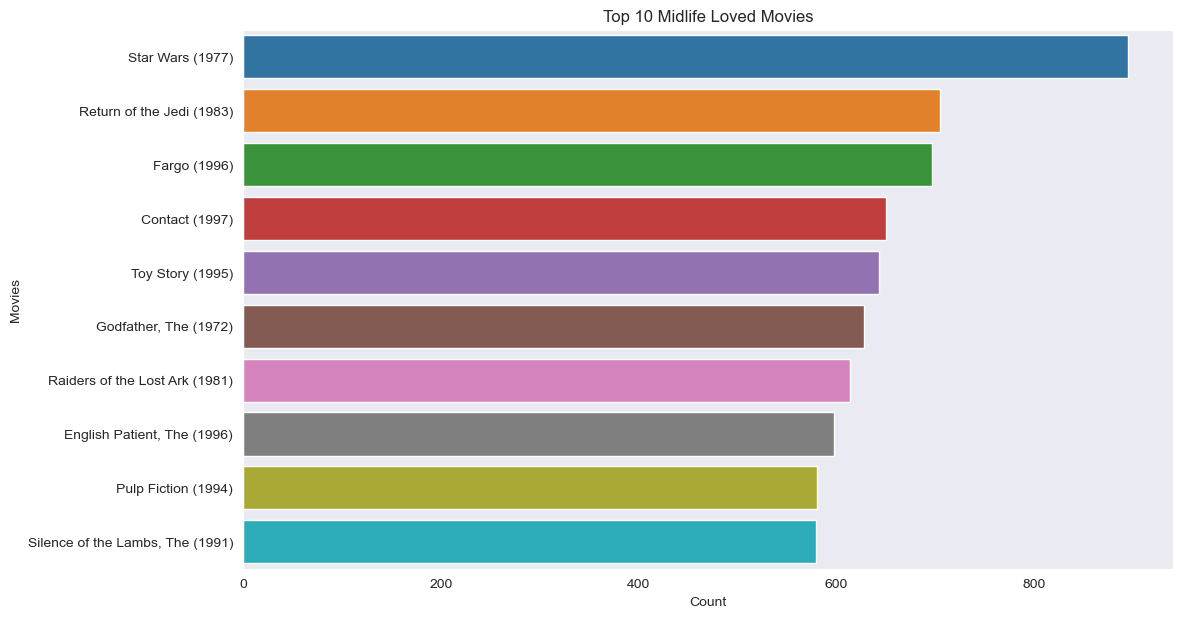

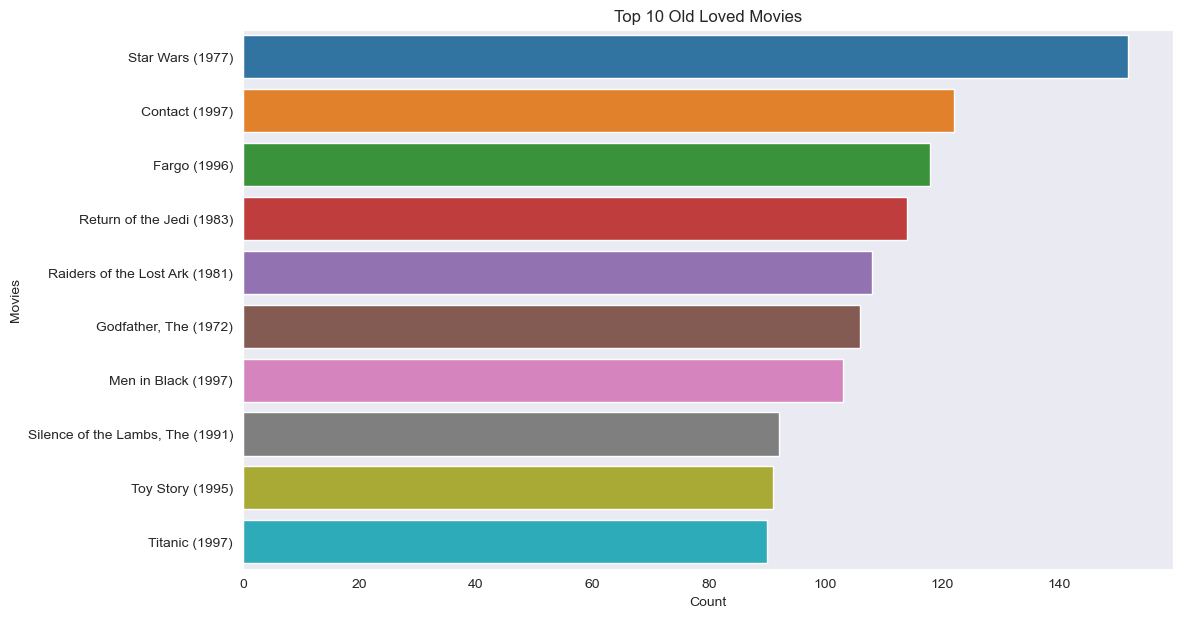

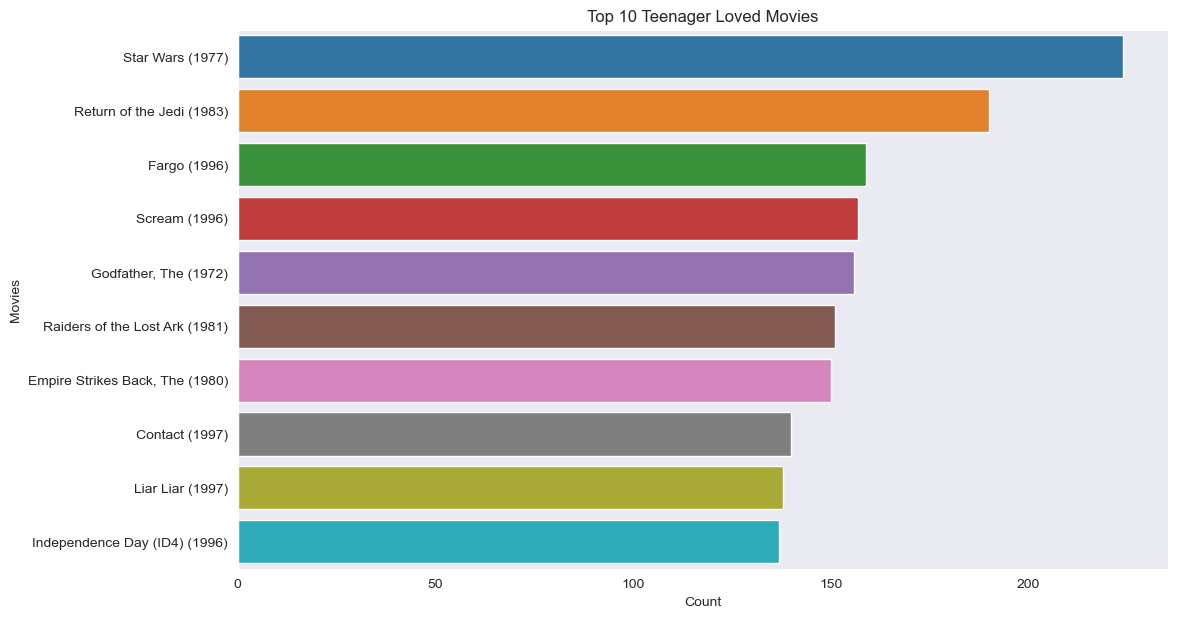

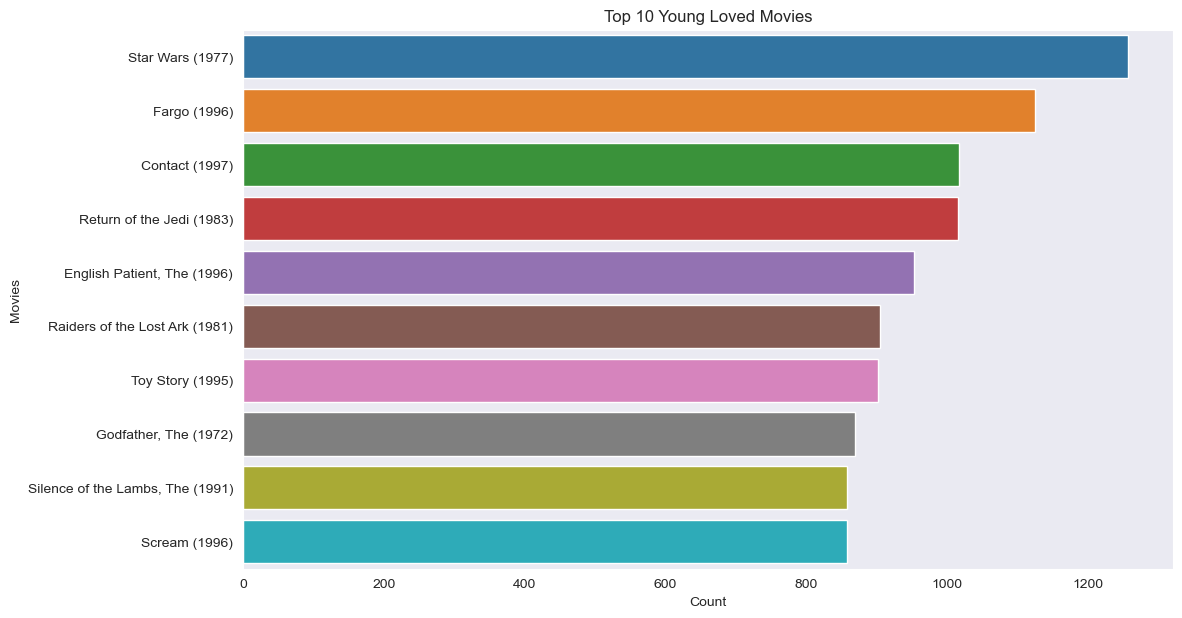

In [86]:
numeric_columns = rating_user_movie_df.select_dtypes(include='number').columns
most_loved_movies_age_group_wise = rating_user_movie_df.groupby(['age_group', 'movie_id'])[numeric_columns].sum().rating

for index_label in most_loved_movies_age_group_wise.index.get_level_values(0).unique():
    top_10_userkind_loved_movies = most_loved_movies_age_group_wise.loc[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_loved_movie_titles = movie_df.set_index('movie_id').loc[top_10_userkind_loved_movies.index, 'movie_title']

    draw_horizontal_movie_bar(top_10_userkind_loved_movie_titles.values, top_10_userkind_loved_movies.values, f'Top 10 {index_label} Loved Movies')

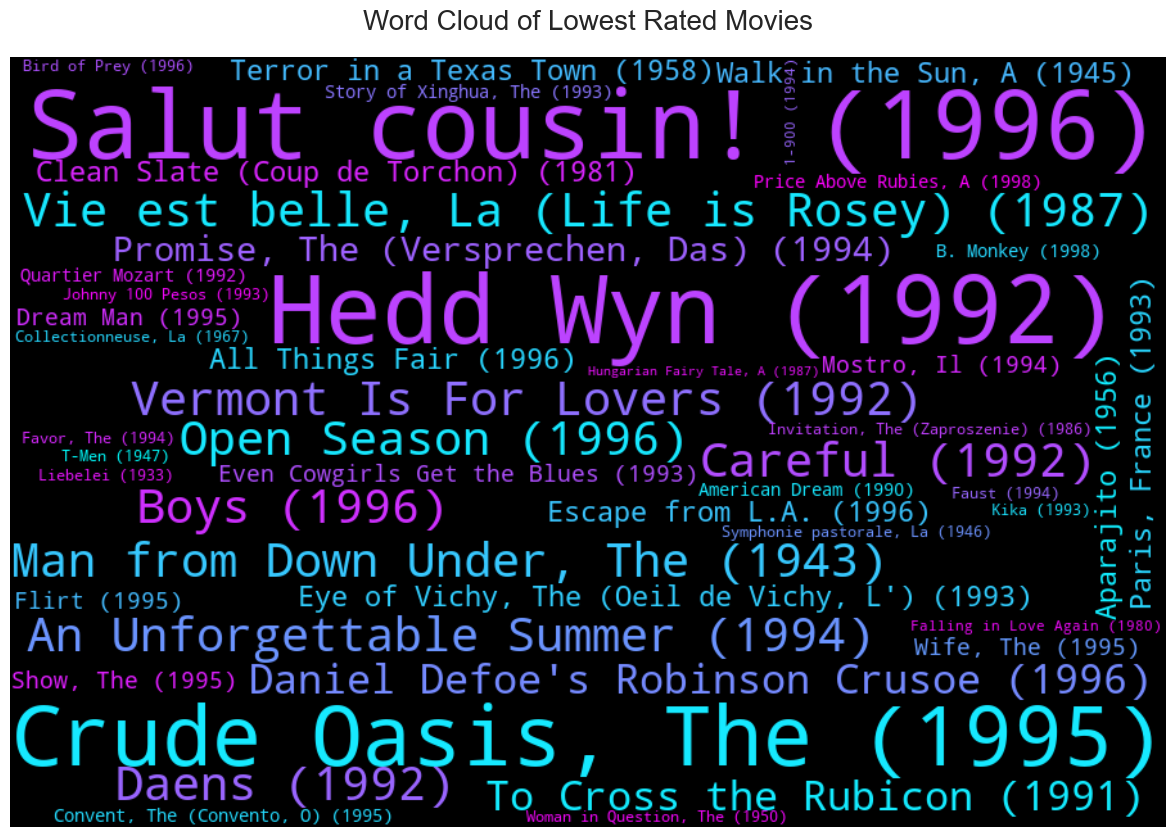

In [90]:
numeric_columns = rating_user_movie_df.select_dtypes(include='number').columns
movies_ratings_sum = rating_user_movie_df.groupby('movie_id')[numeric_columns].sum().rating.sort_values()

movies_ratings_sum.index = movie_df.loc[movies_ratings_sum.index, 'movie_title']

lowest_rated_movies = movies_ratings_sum[movies_ratings_sum <= 10]

wordcloud = WordCloud(
    min_font_size=8,                     
    max_font_size=80,                    
    width=900,                            
    height=600,                           
    random_state=42,                      
    relative_scaling=0.7,                 
    colormap='cool',                      
    max_words=50,                         
    prefer_horizontal=0.9                 
)

wordcloud.generate_from_frequencies(frequencies=(11 - lowest_rated_movies).to_dict())

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Lowest Rated Movies", fontsize=20, pad=20)
plt.show()